In [44]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [45]:
data = pd.read_excel(r'C:\Users\Deyse Novais\Desktop\Análise/Dados.xlsx',index_col='Data', parse_dates=True)

In [46]:
data.index.min(),data.index.max()

(Timestamp('2022-12-06 00:00:00'), Timestamp('2023-01-20 00:00:00'))

In [47]:
data

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317
2022-12-11,685
2022-12-12,1366
2022-12-13,1213
2022-12-14,1055


In [48]:
data.dtypes

Vendas    int64
dtype: object

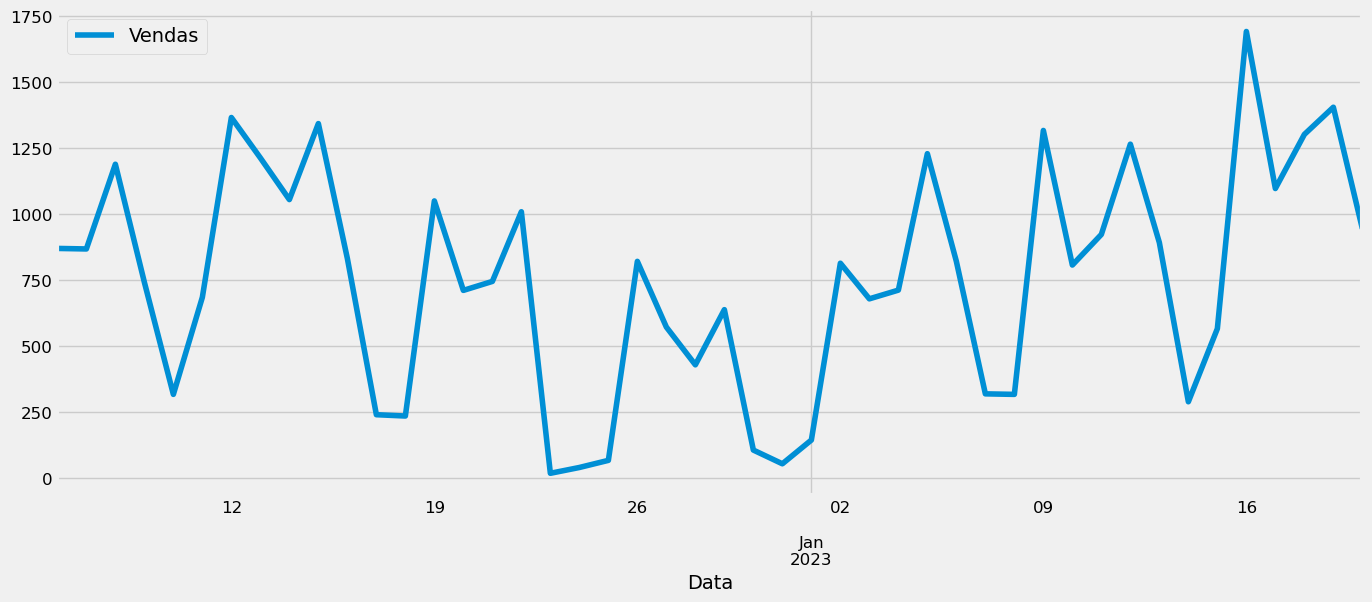

In [49]:
data.plot(figsize=(15, 6))
plt.show()

In [50]:
from pmdarima import auto_arima

<Figure size 1300x900 with 0 Axes>

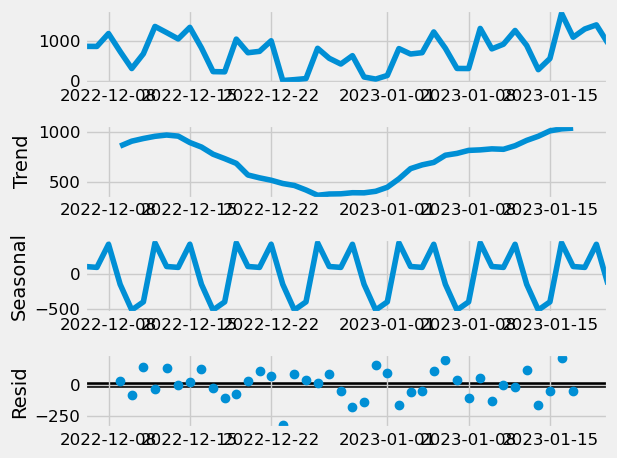

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(data)

fig = plt.figure(figsize=(13, 9))  
fig = resultado.plot()

In [52]:
data.columns = ['producao']

In [53]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(data['producao'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-1.507607361196456
p-valor:0.5297447855798443


In [54]:
fit_arima = auto_arima(data, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, 
                           m=6, 
                           D=1, 
                           start_P=1, 
                           start_Q=1, 
                           max_P=2, 
                           max_Q=2, 
                           information_criterion='aic',
                           trace=True, 
                           error_action='ignore', 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=620.896, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=616.182, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=601.913, Time=0.35 sec
 ARIMA(0,1,1)(0,1,0)[6]             : AIC=604.333, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[6]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(0,1,2)[6]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,1)(1,1,0)[6]             : AIC=605.099, Time=0.31 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,1,1)[6]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=602.440, Time=0.35 sec
 ARIMA(0,1,2)(0,1,1)[6]             : AIC=600.721, Time=0.81 sec
 ARIMA(0,1,2)(0,1,0)[6]             : AIC=606.082, Time=0.21 sec
 ARIMA(0,1,2)(1,1,1)[6]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,2)(0,1,2)[6]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1

In [55]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4585      0.293     -1.565      0.118      -1.033       0.116
ma.L2         -0.3122      0.271     -1.153      0.249      -0.843       0.218
ma.S.L6       -0.7027      0.319     -2.203      0.028      -1.328      -0.078
sigma2      2.263e+05   6.92e+04      3.269      0.001    9.06e+04    3.62e+05


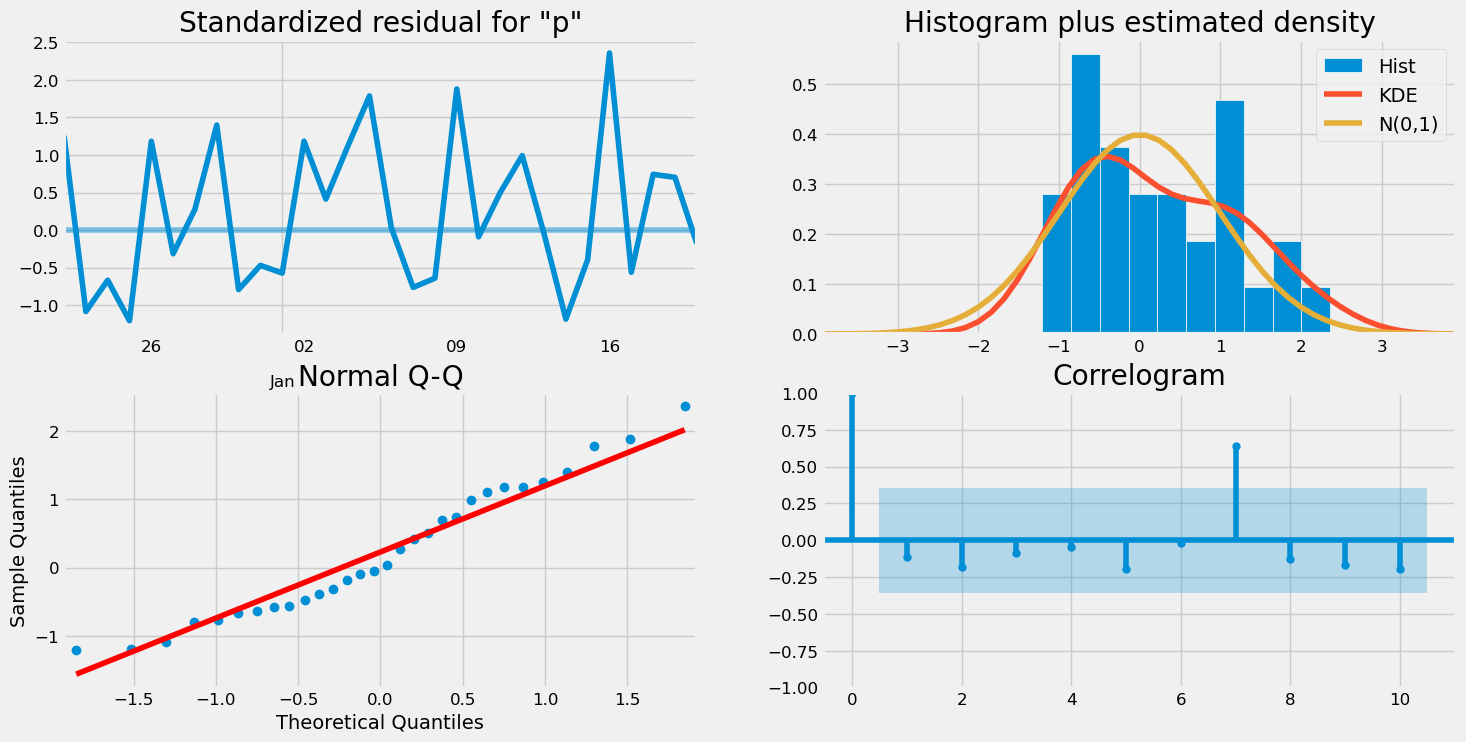

In [56]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data,order=(0,1,2),  seasonal_order=(0, 1, 1, 7))
resultado_sarimax = model.fit()

In [121]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            producao   No. Observations:                   46
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -255.183
Date:                             Thu, 02 Feb 2023   AIC                            518.365
Time:                                     20:41:18   BIC                            524.916
Sample:                                 12-06-2022   HQIC                           520.696
                                      - 01-20-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4888      0.167     -2.919      0.004      -0.817      -0.161
ma.L2          0.1240      0.215      0.578      0.563      -0.297       0.545
ma.S.L7       -0.9972     32.303     -0.031      0.975     -64.310      62.316
sigma2        2.8e+04      9e+05      0.031      0.975   -1.74e+06    1.79e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.02
Prob(Q):                              1.00   Prob(JB):                         0.99
Heteroskedasticity (H):               0.88   Skew:                             0.02
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
predicoes = resultado_sarimax.get_prediction(start=-20)
predicao_media = predicoes.predicted_mean

In [123]:
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(-342.07231816086147, 413.2509739918091)

In [124]:
predicao_media[0]

35.5893279154738

In [125]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(data.index)

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

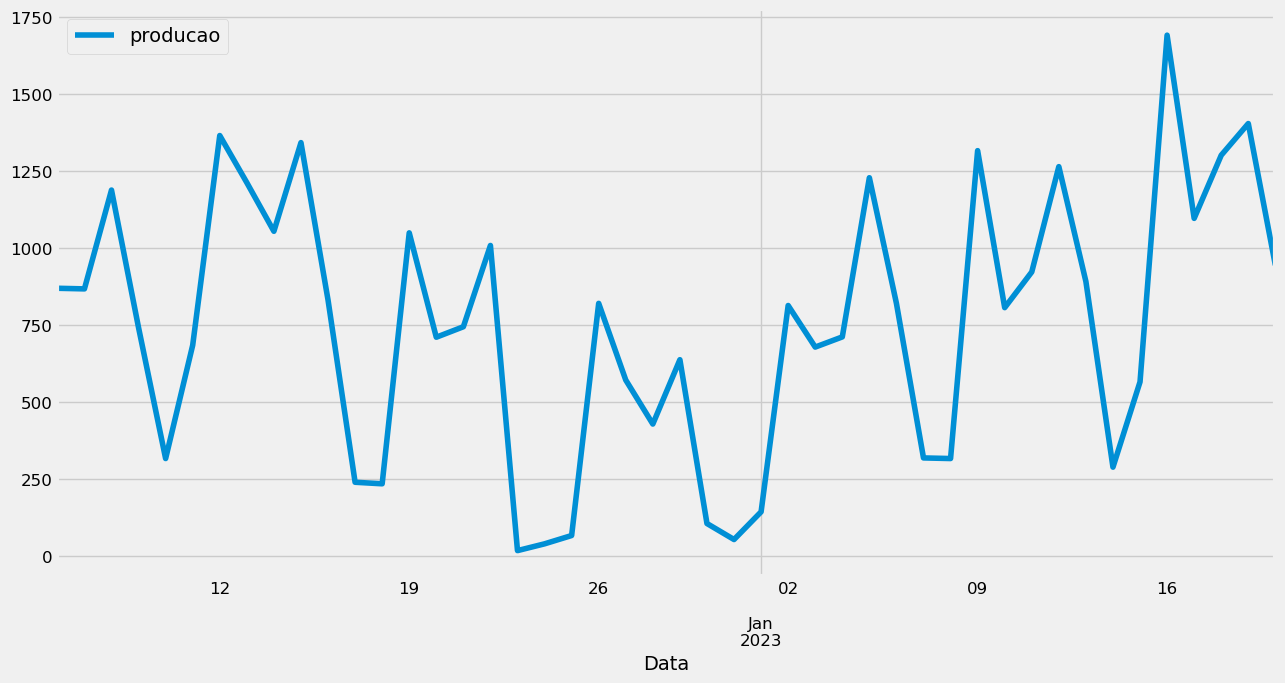

In [133]:
pred = results.get_prediction(start=('2023-01-20'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2022':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão Um-Passo-a-Frente', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

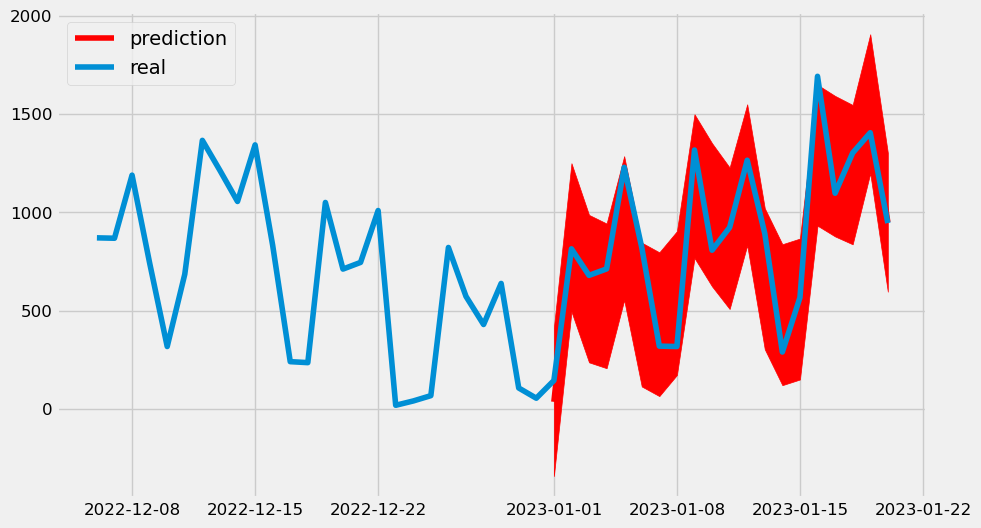

In [132]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, data.values, label='real')
plt.legend()
plt.show()


In [130]:
y_forecasted = pred.predicted_mean
y_truth = data['2023-01-20':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2023-01-20 00:00:00   NaN
producao              NaN
dtype: float64
